In [140]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
#for visulaisation
import matplotlib.pyplot as plt
%matplotlib inline


In [141]:
#import data
import io
%cd "C:\Users\91834\Downloads\hackthon"

C:\Users\91834\Downloads\hackthon


In [142]:
sample_submission=pd.read_csv('sample_submission_eyYijxG.csv')

In [143]:
train_df=pd.read_csv('train_s3TEQDk.csv')

In [144]:
test_df=pd.read_csv('test_mSzZ8RL.csv')

In [145]:
print("no.of rows/coulmns in train data:",train_df.shape)
print("no.of rows/coulmns in test data:",test_df.shape)

no.of rows/coulmns in train data: (245725, 11)
no.of rows/coulmns in test data: (105312, 10)


In [146]:
#display first 5 rows of data in train data
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [147]:
#display first 5 rows of data in test data
test_df.head(4)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No


**Description of dataset:**

* **ID**   - Unique Identifier for a row

* **Gender**  - Gender of the Customer

* **Age**  - Age of the Customer (in Years)

* **Region_Code** - Code of the Region for the customers

* **Occupation** - Occupation Type for the customer

* **Channel_Code** - Acquisition Channel Code for the Customer  (Encoded)
 
* **Vintage** - Vintage for the Customer (In Months)

* **Credit_Product** - If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

* **Avg_Account_Balance** - Average Account Balance for the Customer in last 12 Months

* **Is_Active** - If the Customer is Active in last 3 Months

* **Is_Lead(Target)** - If the Customer is interested for the Credit Card

   0 : Customer is not interested

   1 : Customer is interested

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [11]:
train_df1.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [12]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [13]:
#checking missing data and outliers

In [14]:
#displaying columns names
print(len(train_df1.columns))
print("no.of columns in train data:"'\n' ,train_df1.columns)
print(len(test_df1.columns))
print("no.of columns in test data:"'\n' ,test_df1.columns)


11
no.of columns in train data:
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')
10
no.of columns in test data:
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')


In [15]:
train_df1.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [16]:
test_df1.nunique()

ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64

In [17]:
train_df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
train_df1['Age'].unique()

array([73, 30, 56, 34, 62, 48, 40, 55, 53, 27, 31, 79, 33, 46, 59, 65, 37,
       44, 32, 50, 70, 25, 52, 26, 67, 29, 41, 49, 63, 61, 64, 60, 76, 57,
       36, 28, 58, 43, 35, 71, 82, 45, 42, 54, 47, 78, 51, 68, 83, 39, 84,
       24, 38, 74, 81, 69, 75, 85, 66, 80, 72, 77, 23], dtype=int64)

In [19]:
train_df1['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [20]:
train_df1['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [21]:
train_df1['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [22]:
train_df1['Vintage'].unique()

array([ 43,  32,  26,  19,  33,  20,  13,  38,  49, 123,  14,  31,  57,
        69,  97,  15,  63,  21,  99,  56,  87,  62,  55, 103, 104,  93,
        61,  91,  27,  39,  50,  45,  25, 117,  80,  81,  73,  67, 109,
        92, 122,  75,  79, 121, 111, 116,  85, 115,  86,  37,  74, 110,
        44,   9,  68,  51,  98, 105, 127, 129, 133,   8,   7, 128, 135,
       134], dtype=int64)

In [23]:
train_df1['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [24]:
train_df1['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
train_df1['Is_Lead'].unique()

array([0, 1], dtype=int64)

In [26]:
Target_col='Is_Lead'

In [27]:
categorical_col=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active',]
numerical_col=['Age','Vintage','Avg_Account_Balance']

<AxesSubplot:ylabel='Frequency'>

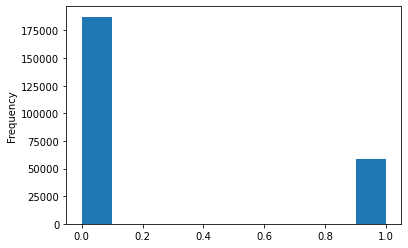

In [28]:
train_df1.Is_Lead.plot.hist()

<AxesSubplot:ylabel='Frequency'>

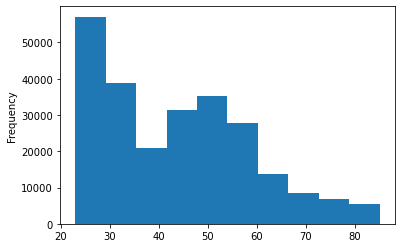

In [29]:
train_df1.Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

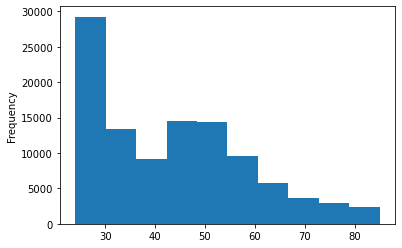

In [30]:
test_df1.Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

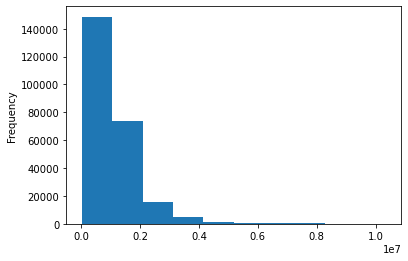

In [31]:
train_df1.Avg_Account_Balance.plot.hist()

<AxesSubplot:ylabel='Frequency'>

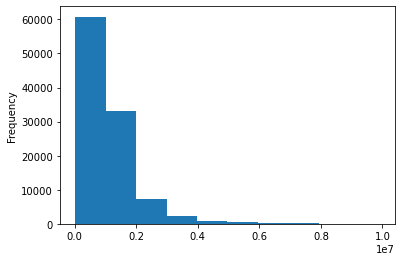

In [32]:
test_df1.Avg_Account_Balance.plot.hist()

<AxesSubplot:ylabel='Frequency'>

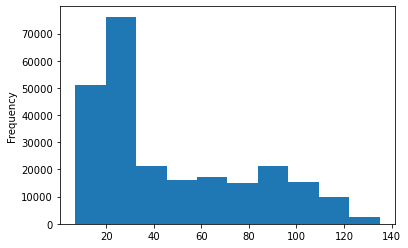

In [33]:
train_df1.Vintage.plot.hist()

<AxesSubplot:ylabel='Frequency'>

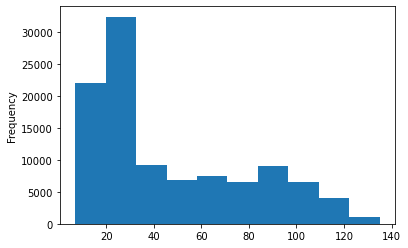

In [34]:
test_df1.Vintage.plot.hist()

In [38]:
#missing values

In [39]:
train_df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Here ,In train_df  we have Credit_Product is categorical column thats's why i'm taking most frequent value in entire column and fill those one in place of missing values

In [40]:
test_df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Here ,In test_df  we have Credit_Product is categorical column thats's why i'm taking most frequent value in entire column and fill those one in place of missing values

In [149]:
train_df['source']='train'
test_df['source']='test'
data=pd.concat([train_df,test_df],ignore_index=True)

In [150]:
data.shape

(351037, 12)

In [151]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [152]:
data.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [153]:
data.dtypes

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
source                  object
dtype: object

In [154]:
data.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

In [155]:
data['Credit_Product'].value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [156]:
data['Credit_Product'].replace(np.nan,'Yes',inplace=True)

C:\Users\91834\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


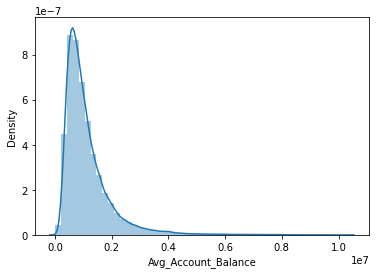

In [157]:
sns.distplot(data['Avg_Account_Balance'])
plt.show()

C:\Users\91834\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


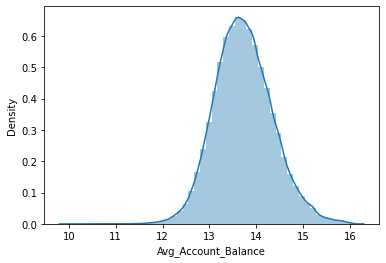

In [159]:
data['Avg_Account_Balance']=np.log(data['Avg_Account_Balance'])
sns.distplot(data['Avg_Account_Balance'])
plt.show()

In [160]:
train_df=data.loc[data['source']=="train"]
test_df=data.loc[data['source']=="test"]

In [161]:
#drop unnecessary columns:
test_df.drop(['Is_Lead','source'],axis=1,inplace=True)
train_df.drop('source',axis=1,inplace=True)

C:\Users\91834\anaconda\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [162]:
train_df.drop('ID',axis=1,inplace=True)
test_df.drop('ID',axis=1,inplace=True)

In [164]:
train_df.dtypes

Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance    float64
Is_Active               object
Is_Lead                float64
dtype: object

In [166]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_mod=['Gender','Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active']
for i in var_mod:
    train_df[i]=le.fit_transform(train_df[i])
    test_df[i]=le.fit_transform(test_df[i])

<ipython-input-166-041bdf28c6ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[i]=le.fit_transform(train_df[i])
<ipython-input-166-041bdf28c6ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[i]=le.fit_transform(test_df[i])


In [167]:
X=train_df.drop('Is_Lead',axis=1)
y=train_df['Is_Lead']

In [168]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score

In [171]:
def cross_val(X,y,model,params,folds=9):
        skf=StratifiedKFold(n_splits=folds,shuffle=True,random_state=21)
        for fold,(train_idx,test_idx) in enumerate(skf.split(X,y)):
            print(f"Fold:{fold}")
            x_train,y_train=X.iloc[train_idx],y.iloc[train_idx]
            x_test,y_test=X.iloc[test_idx],y.iloc[test_idx]
            alg=model(**params)
            alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=100,verbose=400)
            pred=alg.predict_proba(x_test)[:,1]
            roc_score=roc_auc_score(y_test,pred)
            print(f"roc_auc_score:{roc_score}")
            print("-"*50)
        return alg

In [172]:
lgb_params={'learning_rate':0.045,
           'n_estimators':20000,
           'max_bin':94,
           'num_leaves':10,
           'max_depth':27,
           'reg_alpha':8.457,
           'reg_lambda':6.853,
            'subsample':0.749}

In [173]:
from lightgbm import LGBMClassifier
lgb_model=cross_val(X,y,LGBMClassifier,lgb_params)

Fold:0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.378501
[800]	valid_0's binary_logloss: 0.37827
Early stopping, best iteration is:
[802]	valid_0's binary_logloss: 0.378264
roc_auc_score:0.8539183817995556
--------------------------------------------------
Fold:1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382606
Early stopping, best iteration is:
[524]	valid_0's binary_logloss: 0.382519
roc_auc_score:0.8500343931608946
--------------------------------------------------
Fold:2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.384762
Early stopping, best iteration is:
[607]	valid_0's binary_logloss: 0.38465
roc_auc_score:0.847290061663613
--------------------------------------------------
Fold:3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.383285
Early stopping, best iteration is:
[517]	v

In [174]:
xgb_params={'n_estimators':20000,
            'max_depth':6,
            'learning_rate':0.0201,
            'reg_lambda':29.236,
            'subsample':0.818,
            'colsample_bytree':0.235,
            'colsample_bynode':0.820,
            'colsample_bylevel':0.453
           }

In [175]:
from xgboost import XGBClassifier
xgb_model=cross_val(X,y,XGBClassifier,xgb_params)

Fold:0


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68732
[400]	validation_0-logloss:0.39726
[800]	validation_0-logloss:0.38762
[1200]	validation_0-logloss:0.38480
[1600]	validation_0-logloss:0.38354
[2000]	validation_0-logloss:0.38276
[2400]	validation_0-logloss:0.38215
[2800]	validation_0-logloss:0.38180
[3200]	validation_0-logloss:0.38151
[3600]	validation_0-logloss:0.38125
[4000]	validation_0-logloss:0.38100
[4294]	validation_0-logloss:0.38091
roc_auc_score:0.8522618226156934
--------------------------------------------------
Fold:1


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68728
[400]	validation_0-logloss:0.39932
[800]	validation_0-logloss:0.39048
[1200]	validation_0-logloss:0.38791
[1600]	validation_0-logloss:0.38674
[2000]	validation_0-logloss:0.38605
[2400]	validation_0-logloss:0.38544
[2800]	validation_0-logloss:0.38515
[3200]	validation_0-logloss:0.38491
[3600]	validation_0-logloss:0.38473
[4000]	validation_0-logloss:0.38454
[4294]	validation_0-logloss:0.38448
roc_auc_score:0.8491323585964945
--------------------------------------------------
Fold:2


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68730
[400]	validation_0-logloss:0.40129
[800]	validation_0-logloss:0.39230
[1200]	validation_0-logloss:0.38951
[1600]	validation_0-logloss:0.38824
[2000]	validation_0-logloss:0.38750
[2400]	validation_0-logloss:0.38697
[2800]	validation_0-logloss:0.38654
[3200]	validation_0-logloss:0.38631
[3562]	validation_0-logloss:0.38615
roc_auc_score:0.8470288284500749
--------------------------------------------------
Fold:3


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68731
[400]	validation_0-logloss:0.40163
[800]	validation_0-logloss:0.39275
[1200]	validation_0-logloss:0.38990
[1600]	validation_0-logloss:0.38851
[2000]	validation_0-logloss:0.38766
[2400]	validation_0-logloss:0.38692
[2800]	validation_0-logloss:0.38658
[3200]	validation_0-logloss:0.38625
[3600]	validation_0-logloss:0.38598
[4000]	validation_0-logloss:0.38566
[4293]	validation_0-logloss:0.38558
roc_auc_score:0.8477041056015404
--------------------------------------------------
Fold:4


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68737
[400]	validation_0-logloss:0.39831
[800]	validation_0-logloss:0.38874
[1200]	validation_0-logloss:0.38596
[1600]	validation_0-logloss:0.38472
[2000]	validation_0-logloss:0.38396
[2400]	validation_0-logloss:0.38339
[2800]	validation_0-logloss:0.38299
[3200]	validation_0-logloss:0.38271
[3600]	validation_0-logloss:0.38253
[4000]	validation_0-logloss:0.38233
[4236]	validation_0-logloss:0.38227
roc_auc_score:0.8519756786718707
--------------------------------------------------
Fold:5


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68736
[400]	validation_0-logloss:0.39911
[800]	validation_0-logloss:0.39025
[1200]	validation_0-logloss:0.38760
[1600]	validation_0-logloss:0.38632
[2000]	validation_0-logloss:0.38553
[2400]	validation_0-logloss:0.38491
[2800]	validation_0-logloss:0.38453
[3200]	validation_0-logloss:0.38423
[3600]	validation_0-logloss:0.38397
[3986]	validation_0-logloss:0.38373
roc_auc_score:0.8498226280699439
--------------------------------------------------
Fold:6


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68732
[400]	validation_0-logloss:0.39691
[800]	validation_0-logloss:0.38729
[1200]	validation_0-logloss:0.38431
[1600]	validation_0-logloss:0.38288
[2000]	validation_0-logloss:0.38201
[2400]	validation_0-logloss:0.38137
[2800]	validation_0-logloss:0.38093
[3200]	validation_0-logloss:0.38061
[3600]	validation_0-logloss:0.38039
[4000]	validation_0-logloss:0.38015
[4400]	validation_0-logloss:0.38003
[4800]	validation_0-logloss:0.37988
[5200]	validation_0-logloss:0.37977
[5363]	validation_0-logloss:0.37975
roc_auc_score:0.8538634019740025
--------------------------------------------------
Fold:7


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68731
[400]	validation_0-logloss:0.40096
[800]	validation_0-logloss:0.39058
[1200]	validation_0-logloss:0.38678
[1600]	validation_0-logloss:0.38489
[2000]	validation_0-logloss:0.38395
[2400]	validation_0-logloss:0.38352
[2800]	validation_0-logloss:0.38318
[3200]	validation_0-logloss:0.38287
[3600]	validation_0-logloss:0.38258
[4000]	validation_0-logloss:0.38235
[4400]	validation_0-logloss:0.38219
[4800]	validation_0-logloss:0.38202
[5200]	validation_0-logloss:0.38194
[5600]	validation_0-logloss:0.38181
[5752]	validation_0-logloss:0.38180
roc_auc_score:0.852507202980168
--------------------------------------------------
Fold:8


C:\Users\91834\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68734
[400]	validation_0-logloss:0.40377
[800]	validation_0-logloss:0.39346
[1200]	validation_0-logloss:0.38950
[1600]	validation_0-logloss:0.38756
[2000]	validation_0-logloss:0.38656
[2400]	validation_0-logloss:0.38603
[2800]	validation_0-logloss:0.38568
[3200]	validation_0-logloss:0.38533
[3600]	validation_0-logloss:0.38510
[4000]	validation_0-logloss:0.38486
[4400]	validation_0-logloss:0.38469
[4800]	validation_0-logloss:0.38450
[5200]	validation_0-logloss:0.38438
[5600]	validation_0-logloss:0.38424
[5724]	validation_0-logloss:0.38425
roc_auc_score:0.8483630944701552
--------------------------------------------------


In [176]:
cat_params={'n_estimators':20000,
            'depth':4,
            'learning_rate':0.023,
            'colsample_bylevel':0.655,
            'bagging_temperature':0.921,
            'l2_leaf_reg':10.133
    
}

In [178]:
from catboost import CatBoostClassifier
cat_model=cross_val(X,y,CatBoostClassifier,cat_params)

Fold:0
0:	learn: 0.6764678	test: 0.6763910	best: 0.6763910 (0)	total: 300ms	remaining: 1h 39m 51s
400:	learn: 0.3840038	test: 0.3811881	best: 0.3811881 (400)	total: 24.2s	remaining: 19m 40s
800:	learn: 0.3816523	test: 0.3794338	best: 0.3794338 (800)	total: 47.8s	remaining: 19m 6s
1200:	learn: 0.3804355	test: 0.3789120	best: 0.3789120 (1200)	total: 1m 11s	remaining: 18m 46s
1600:	learn: 0.3796263	test: 0.3788468	best: 0.3788468 (1600)	total: 1m 37s	remaining: 18m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3788059237
bestIteration = 1696

Shrink model to first 1697 iterations.
roc_auc_score:0.853424567689949
--------------------------------------------------
Fold:1
0:	learn: 0.6764287	test: 0.6764170	best: 0.6764170 (0)	total: 72.2ms	remaining: 24m 4s
400:	learn: 0.3835105	test: 0.3849751	best: 0.3849751 (400)	total: 22.9s	remaining: 18m 40s
800:	learn: 0.3810271	test: 0.3833307	best: 0.3833307 (800)	total: 48.5s	remaining: 19m 22s
1200:	learn: 0.3799066	tes

In [181]:
pred_test_lgb=lgb_model.predict_proba(test_df)[:,1]
pred_test_xgb=xgb_model.predict_proba(test_df)[:,1]
pred_test_cat=cat_model.predict_proba(test_df)[:,1]
prediction=(pred_test_lgb+pred_test_xgb+pred_test_cat)

In [182]:
sample_submission['Is_Lead']=prediction
sample_submission.to_csv(f'submission.csv',index=False)

In [183]:
sample_submission['Is_Lead']=pred_test_lgb
sample_submission.to_csv(f'pred_test_lgb.csv',index=False)

sample_submission['Is_Lead']=pred_test_xgb
sample_submission.to_csv(f'pred_test_xgb.csv',index=False)

sample_submission['Is_Lead']=pred_test_cat
sample_submission.to_csv(f'pred_test_cat.csv',index=False)